<hr>
Este material ha sido construido en conjunto con material suministrado por los profesores Pedro Atencio (Instituto Tecnológico Metropolitano), Carlos Mera (Universidad de Medellin), Albeiro Espinosa y Diego Patiño (Universidad Nacional de Colombia, Sede Medellín); a ellos les damos crédito.
<hr>

#  <center> VISIÓN ARTIFICIAL </center>
## Agenda del día


### Unidad 3 - Fundamentos del color


<hr>
## 3.1. El  color


El color es una **sensación**, derivada de la capacidad del ojo de captar la longitud de onda en 3 frecuencias diferentes del espectro electromagnético visible.

<img width="600" height="600" src="res/color_1.png"/>

<br>

## El Color: El Triestimulo de la Percepción del Color

La retina humana tiene 3 tipos de conos y cada tipo de cono tiene una respuesta diferente en función de la longitud de onda de la luz. Muy similar al concepto de adquisición con arreglos de sensores que tratamos durante la clase pasada.

<img width="500" height="500" src="res/color_2.png"/>

## El Color de los Objetos

Los objetos se ven en diferentes colores porque absorben una parte de las ondas electromagnéticas y reflejan las restantes. Las ondas reflejadas son captadas por el ojo e interpretadas cómo colores según las longitudes de ondas correspondientes. 

<img width="600" height="600" src="res/color_3.png"/>



## Mezcla de Colores

El significado diferente del color en la luz (espectro emitido) y en los objetos (espectro reflejado) da lugar a dos modos de ver el proceso de mezcla de colores: modelo aditivo y substractivo.

### Modelo Aditivo Mezcla

Los colores se obtiene sumando los espectros de luz. En este modelo los colores primarios suelen ser rojo, verde y azul. La mezcla de estos puede generar cualquier color perceptible por el ojo humano.

Dispositivos como las pantallas y televisores usan mezclas aditivas para generar el color.

<img width="400" height="400" src="res/color_4.png"/>

### Modelo Sustractivo: 

En la síntesis sustractiva el color de partida siempre suele ser el color acromático blanco. En este modelo los colores actúan como filtros. P.E. el amarillo refleja el verde y el rojo, pero bloquea el azul.

Este modelo es por ejemplo, el usado para mezclar pinturas. Cada color de pintura absorbe ciertos colores y refleja otros. Cada vez que se agrega un color pintura a una mezcla, hay más colores absorbidos y menos reflejados.

Una base de colores primarios para este modelo son el Cyan, Magenta y Amarillo.

<img width="400" height="400" src="res/color_5.png"/>

<hr>


## 3.2. Manejo básico de imágenes



Una imagen con un solo canal (matriz bidimensional) se conoce como imagen en escala de grises. Usualmente las principales técnicas de procesamiento de imágenes se aplican sobre imágenes de este tipo.
<br><br>
Cuando se habla de imágenes a color, el modelo más utilizado es el RGB. Una imagen a color en el espacio RGB, es una matriz 3-dimensional o una composición de tres imagenes a escala de grises, cada una conteniendo los valores de cada canal. Por convención, el canal 0 es el color Rojo, el canal 1 es el color Verde y el canal 2 es el color Azul.


<img src="res/img1.png"/>

A continuación, importemos las tres librerías que utilizaremos para el desarrollo de la clase: Matplotlib, Numpy, OpenCV.

In [2]:
%matplotlib inline 
#Magic para mostrar imágenes en Jupyter usando matplotlib

import numpy as np
import cv2
import matplotlib.pyplot as plt

Hablemos un poco de la función *imread* de OpenCV. Esta función recibe dos parámetros: una cadena que especifica la ruta de la imagen (obligatorio), y una bandera que indicará cómo queremos leer la imagen (opcional).

    cv2.IMREAD_COLOR : Carga la imagen a color, omitiendo transparencias. Es la bandera por defecto.
    cv2.IMREAD_GRAYSCALE : Carga la imagen en escala de grises.
    cv2.IMREAD_UNCHANGED : Carga la imagen como tal, incluyendo el canal alpha si existe.

**Nota:** OpenCV cuenta con banderas para otras funciones. Basta con saber cuando una función recibe banderas como parámetro y buscar en la documentación de la misma.

Leamos una imagen en escala de grises y mostrémosla utilizando la función *imshow* del módulo pyplot de matplotlib. Esta función tiene muchos parámetros que iremos detallando durante el transcurso del curso. Sin embargo, es una buena idea echar un vistazo a la documentación:

http://matplotlib.org/users/image_tutorial.html <br>
https://matplotlib.org/api/pyplot_api.html <br>
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html <br>
https://www.pyimagesearch.com/2014/11/03/display-matplotlib-rgb-image/ <br>
https://www.labri.fr/perso/nrougier/teaching/matplotlib/


Afortunadamente, la mayoría de parámetros que recibe la función *imshow* son opcionales. Para este primer ejemplo le pasaremos a la función únicamente la imagen (obligatorio) y la variable **cmap** (de color map). El mapa de color solo puede ser utilizado para imágenes de un único canal, pero puede ser muy útil cuando queremos discernir mejor la variación entre niveles de gris.

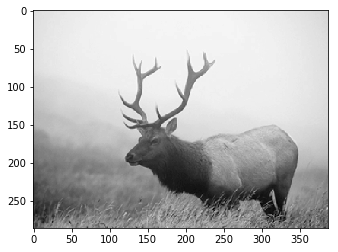

In [66]:
img = cv2.imread("res/alce.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray") #gray, hot, jet...

### Las imágenes en escala de grises son arreglos bidimensionales, esto quiere decir que podemos acceder a un píxel arbitrario tal como lo haríamos en una matriz.

In [69]:
print(img[200,250])

185


### Gracias a la simplicidad de Python podemos extraer "slices" (tajadas) de la imagen por medio de operaciones de indexación. Para este fin, es importante revisar la documentación de numpy sobre slicing.

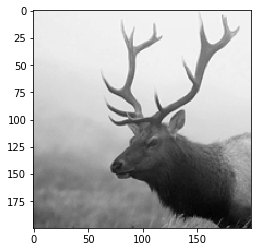

In [35]:
img_slice = img[50:250,50:250] #Si nuestra imagen fuese a color, bastaría con añadir
                               #un tercer indice: img[50:250,50:250,:]
                               # : equivale a los valores mínimo y máximo del arreglo,
                               # nos permite conservar todos los valores en una dimensión dada
                               # y efectuar slicing en otra.
plt.imshow(img_slice, cmap="gray")


### El slicing también se puede usar para asignar valores. En este caso manipulamos la imagen, por lo que es conveniente crear una copia.

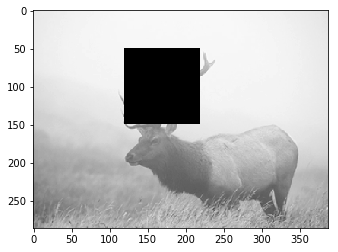

In [36]:
img = cv2.imread("res/alce.png", cv2.IMREAD_GRAYSCALE)
img_with_hole = img.copy()
img_with_hole[50:150,120:220] = 0 
plt.imshow(img_with_hole, cmap="gray")

### También podemos guardar la imagen, con el comando *imwrite*.

In [56]:
cv2.imwrite("alce_sin_ornamenta.jpg", img_with_hole);

### Ahora leamos una imagen a color...

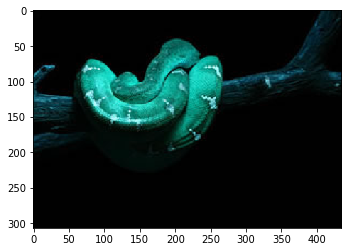

In [37]:
img_color = cv2.imread("res/serpiente.png", cv2.IMREAD_COLOR)
plt.imshow(img_color)


# ATENCIÓN

OpenCV maneja el modelo de color BGR, donde el canal principal 0 representa al color azul, el canal 1 representa al color verde, y el canal 2 representa al color rojo. Esto significa que al momento de leer una imagen con OpenCV, si queremos mostrarla con alguna librería como Matplotlib, esta tendrá los colores invertidos, como se observa arriba.

¿Cómo solucionamos este problema? Pensemos en una posible solución. Entre tanto, verifiquemos algunas de las propiedades que podemos extraer de una imagen...

In [38]:
img_type = type(img_color)
print("El tipo de estructura de datos de la imagen: ", img_type)

El tipo de estructura de datos de la imagen:  <class 'numpy.ndarray'>


In [39]:
img_datatype = img_color.dtype        #Nos retorna el tipo de datos que maneja la imagen
img_shape = np.shape(img_color)   #Nos retorna una lista con 
img_ratio = img_shape[1] / img_shape[0]
print("El tipo de datos de la imagen: ", img_datatype)
print("Las dimensiones de la imagen: ", img_shape)
print("La tasa anchura/altura de la imagen:  ", img_ratio)

El tipo de datos de la imagen:  uint8
Las dimensiones de la imagen:  (307, 435, 3)
La tasa anchura/altura de la imagen:   1.4169381107491856


Arreglemos nuestra imagen a color de la manera "larga": creamos una imagen vacía y a esa imagen vacía le asignamos los canales de color de la imagen en BGR con orden inverso.

In [46]:
img_fixed = np.zeros(img_shape, dtype=np.uint8)
img_fixed[:,:,0] = img_color[:,:,2]
img_fixed[:,:,1] = img_color[:,:,1]
img_fixed[:,:,2] = img_color[:,:,0]

Nota: Utilizando matplotlib, podemos mostrar más de una imagen a la vez...


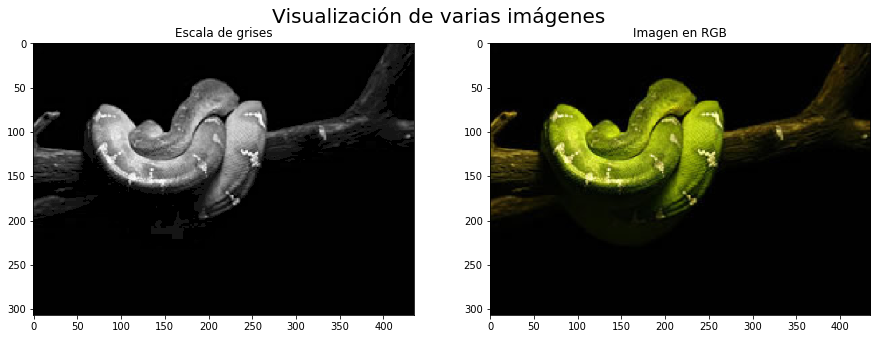

In [49]:
img_gray = cv2.imread("res/serpiente.png", cv2.IMREAD_GRAYSCALE)
img_color = cv2.imread("res/serpiente.png", cv2.IMREAD_COLOR)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))

fig.suptitle('Visualización de varias imágenes', fontsize=20)
ax1.set_title('Escala de grises')
ax1.imshow(img_gray, cmap='gray', aspect='auto')
ax2.set_title('Imagen en RGB')
ax2.imshow(img_fixed, cmap='gray', aspect='auto')


<br>

# ACTIVIDAD 1: Lea con OpenCV la imagen "alce.jpg" que está dentro de la carpeta "res". Conviértala a RGB y luego divídala en cuatro cuadrantes tales que el primer cuadrante muestre el color original de la imagen, el segundo muestre el canal azul únicamente, el tercero muestre el canal verde y el cuarto muestre el canal rojo. Ejemplo:
<br>


<img src="res/actividad1.png"/>

### Nota: OpenCV tiene la función cvtColor, que nos permite cambiar con facilidad entre espacios o modelos de color...

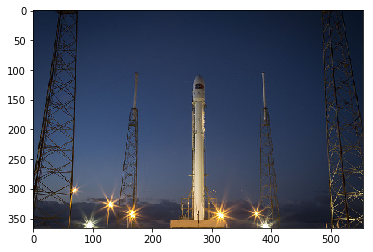

In [63]:
img = cv2.imread("res/cohete.png", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

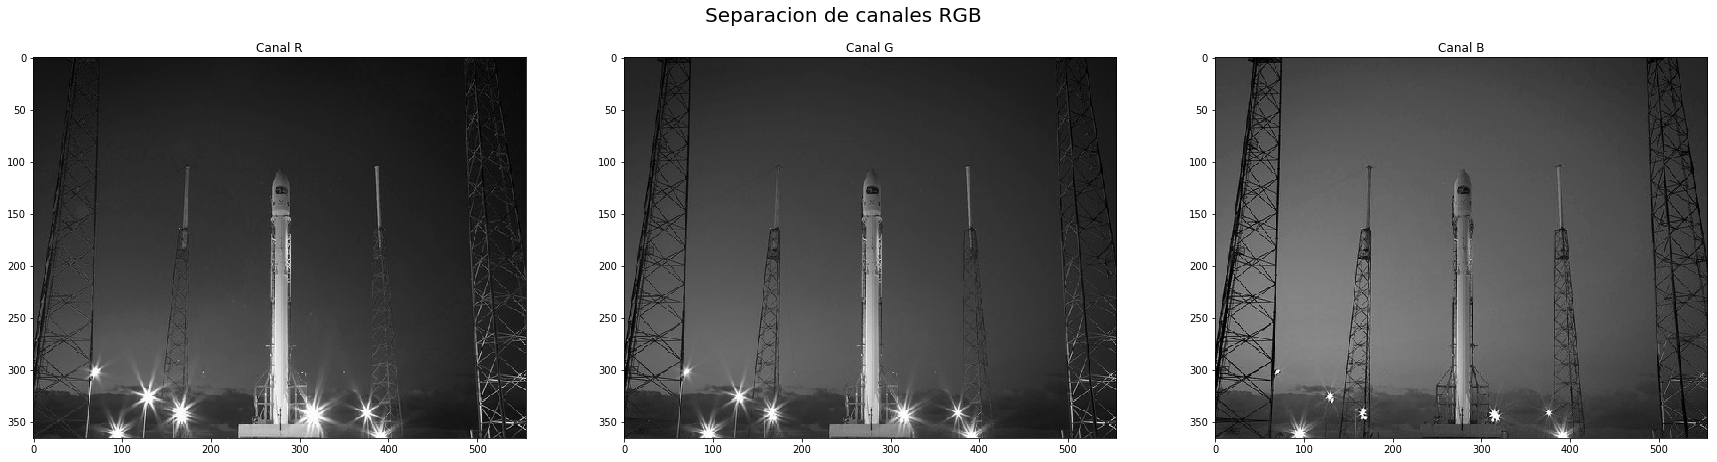

In [62]:
#Como vimos antes, los canales R, G y B se pueden separar de la imagen original accediendo
#en forma de indices

img_R = img[:,:,0]
img_G = img[:,:,1]
img_B = img[:,:,2]

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(30, 7))
fig.suptitle('Separacion de canales RGB', fontsize=20)
ax1.set_title('Canal R')
ax1.imshow(img_R, cmap='gray', aspect='auto')
ax2.set_title('Canal G')
ax2.imshow(img_G, cmap='gray', aspect='auto')
ax3.set_title('Canal B')
ax3.imshow(img_B, cmap='gray', aspect='auto')

#### Como vemos, distintos canales del RGB revelan distintos niveles de contraste entre los objetos de una imagen... Este es un factor importante a considerar para el resto de la materia.

## 3.3. Conceptos relacionados con el color

### Matiz (HUE) o Cromaticidad
Es el atributo por la que el color de un objeto se clasifica como rojo, azul, verde o amarillo de acuerdo a la longitud de onda predominante con referencia al espectro visible. 

<img src="res/color_6.png"/>

Cuando uno dice “este objeto es rojo” se está especificando su matiz, pues probablemente el objeto no sea un rojo puro, pero sí predominan las longitudes de onda cercanas al rojo.

### Brillo o Luminosidad
Se refiere a la intensidad del color y se usa para determinar que tan claro u oscuro es un color. Por ejemplo el color Blanco es un color brillante, mientras que el gris es un blanco menos brillante. 


<img src="res/color_7.gif"/>

### Saturación o Intensidad

Se refiere a la pureza relativa o cantidad de luz blanca mezclada con un matiz. La saturación es el “grado de color” que lo diferencia de un gris con el mismo brillo.

<img src="res/color_8.gif"/>

### Matriz brillo-saturación

<img src="res/color_9.png" width="800">

Para normalizar la representación del color, la Commission Internationale l’Éclairage estudió la percepción del color en los humanos y desarrolló, en 1931, un modelo matemático llamado CIE XYZ aproximado por experimentación.

Basándose en que el ojo humano tiene tres tipos de sensores de color (XYZ), este modelo representa todos los colores visibles basándose en la cromaticidad y el brillo.

Eliminado el brillo del espacio de color, la cromaticidad se puede definir con dos parámetros x e y:

# <center> $x = \frac{X}{X + Y + Z}$ </center>

# <center> $y = \frac{Y}{X + Y + Z}$ </center> 

<img src="res/color_10.png"/>

## 3.4.  Modelos de color

Un Modelo de Color es una especificación de un sistema de coordenadas en el que cada color está representado por un único punto.  Existen varias representaciones o modelos de color. Estos modelos los podemos dividir en dos clases.:

Unos son los modelos que están más orientados a los equipos, por ejemplo las cámaras, monitores y televisores, a los que llamaremos **Modelos Sensoriales**. 

Otros son los modelos que se asemejan más a la percepción humana y que, en general, están orientados al procesamiento de imágenes y visión, éstos se denominan **Modelos Perceptuales**. 


## Modelos Sensoriales: 
Existen 4 modelos comúnmente utilizados RGB, CMY, YIQ e YUV.

### Modelo RGB

El modelo RGB es un modelo aditivo, que debe su nombre a las iniciales de los tres colores primarios: Red (rojo), Green (verde) y Blue (azul).

La combinación aditiva de estos colores primarios produce todo el rango de colores representables en RGB.

<img src="res/rgb.png"/>


El modelo RGB es el más utilizado en la práctica. Pero no es completo: existen colores que no se pueden obtener con la combinación de R, G y B. Se puede comprobar en el diagrama cromático CIE:
<img src="res/rgb2.png"/>


### Modelo CMY

El modelo CMY es usado ciertos aplicaciones, como por ejemplo en pintura e impresión de imágenes. El modelo CMY (o CMYK) está basado en un modelo sustractivo y en la práctica, no llega a producir negro, sino una especie de gris.

<img src="res/cmy.png"/>

### RGB vs CMY



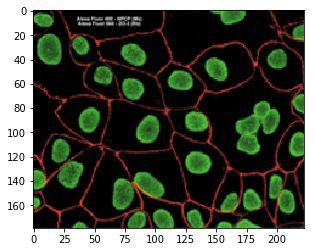

In [41]:
img = cv2.imread("res/cells.png", cv2.IMREAD_COLOR)
img_rgb  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

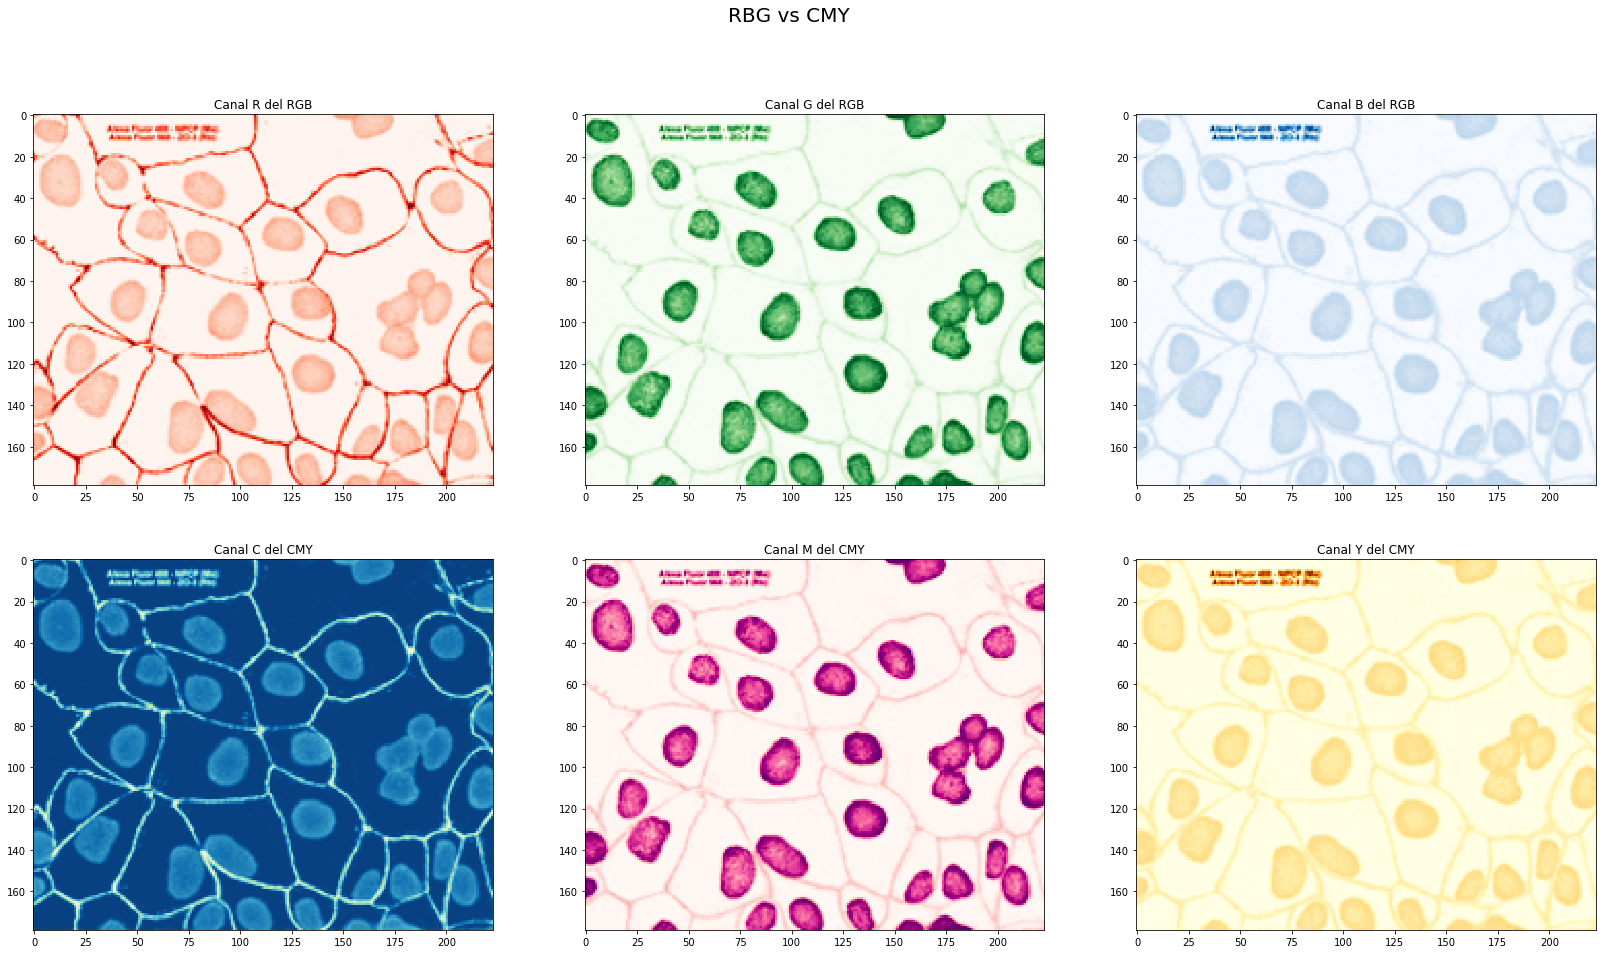

In [42]:


img_R = img_rgb[:,:,0]
img_G = img_rgb[:,:,1]
img_B = img_rgb[:,:,2]


img_C = 255 - img_rgb[:,:,0]
img_M = 255 - img_rgb[:,:,1]
img_Y = 255 - img_rgb[:,:,2]



fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(28, 15))
fig.suptitle('RBG vs CMY', fontsize=20)
ax1.set_title('Canal R del RGB')
ax1.imshow(img_R, cmap='Reds', aspect='auto')
ax2.set_title('Canal G del RGB')
ax2.imshow(img_G, cmap='Greens', aspect='auto')
ax3.set_title('Canal B del RGB')
ax3.imshow(img_B, cmap='Blues', aspect='auto')
ax4.set_title('Canal C del CMY')
ax4.imshow(img_C, cmap='GnBu', aspect='auto')
ax5.set_title('Canal M del CMY')
ax5.imshow(img_G, cmap='RdPu', aspect='auto')
ax6.set_title('Canal Y del CMY')
ax6.imshow(img_B, cmap='YlOrBr', aspect='auto')

### Modelo YIQ

El modelo YIQ  separa la información de intensidad o luminancia (Y) de la información de color (I, Q). Es un modelo que antiguamente usaba el estándar de televisión NTSC. 

<img src="res/yiq.png"/>

### RGB vs YIQ

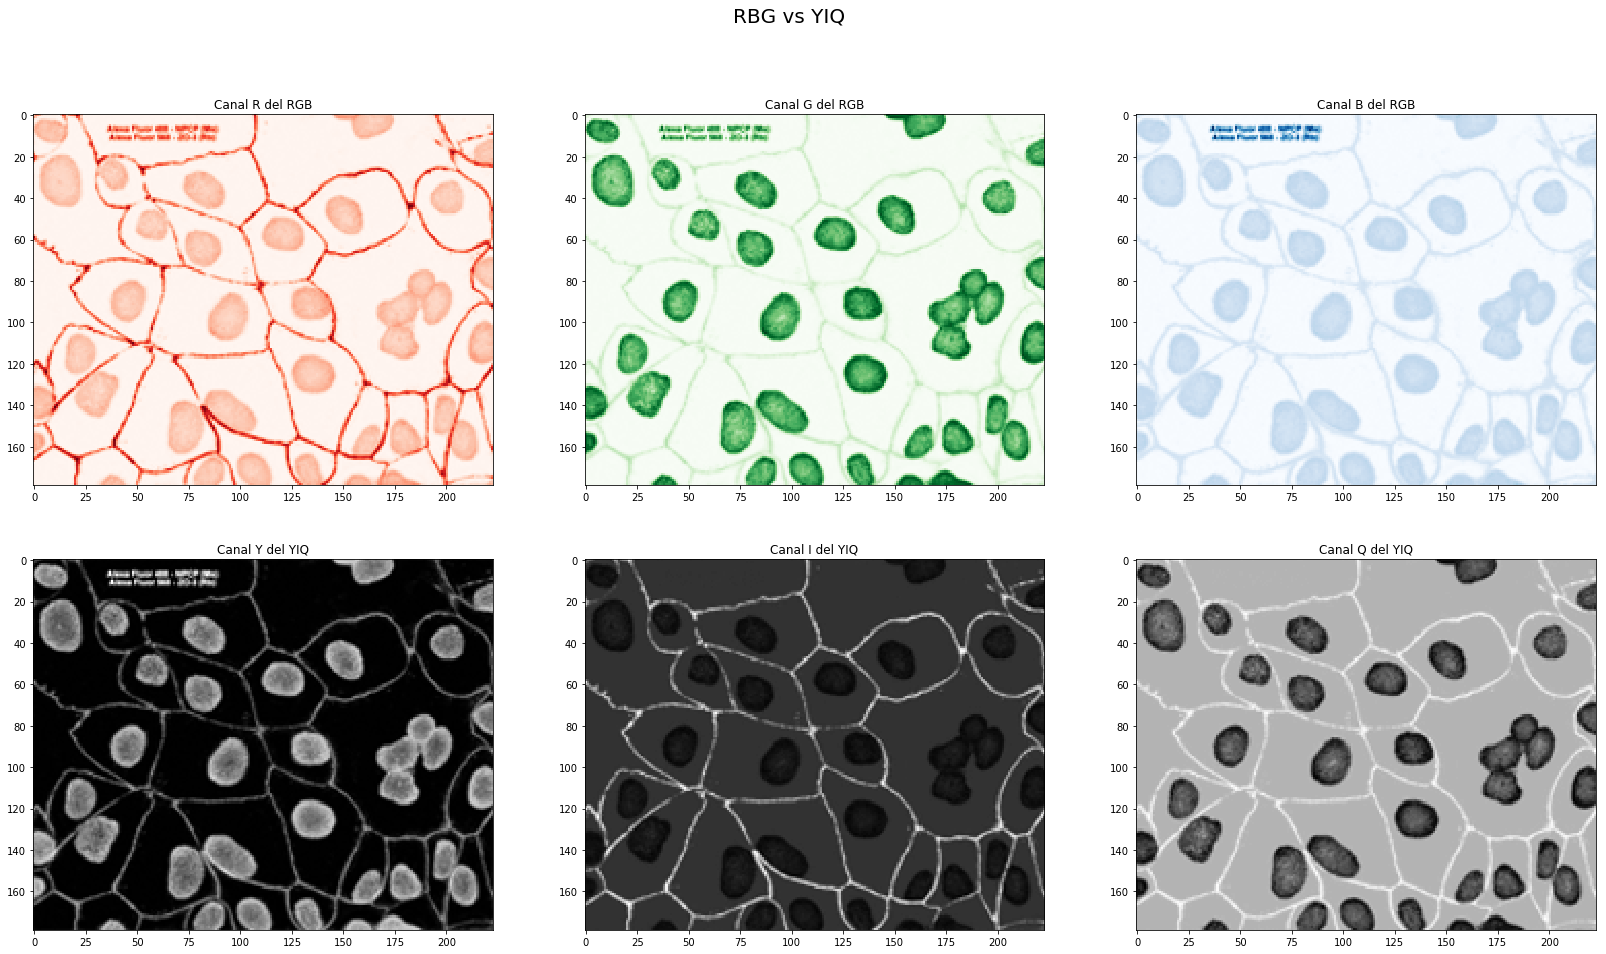

In [43]:
img = cv2.imread("res/cells.png", cv2.IMREAD_COLOR)

img_rgb  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_R = img_rgb[:,:,0]
img_G = img_rgb[:,:,1]
img_B = img_rgb[:,:,2]

img_Y = 0.299*img_R + 0.587*img_G + 0.114*img_B
img_I = 0.596*img_R - 0.274*img_G - 0.322*img_B
img_Q = 0.211*img_R - 0.523*img_G + 0.312*img_B

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(28, 15))
fig.suptitle('RBG vs YIQ', fontsize=20)
ax1.set_title('Canal R del RGB')
ax1.imshow(img_R, cmap='Reds', aspect='auto')
ax2.set_title('Canal G del RGB')
ax2.imshow(img_G, cmap='Greens', aspect='auto')
ax3.set_title('Canal B del RGB')
ax3.imshow(img_B, cmap='Blues', aspect='auto')
ax4.set_title('Canal Y del YIQ')
ax4.imshow(img_Y, cmap='gray', aspect='auto')
ax5.set_title('Canal I del YIQ')
ax5.imshow(img_I, cmap='gray', aspect='auto')
ax6.set_title('Canal Q del YIQ')
ax6.imshow(img_Q, cmap='gray', aspect='auto')

### Modelo YUV

El modelo YUV permite utilizar un ancho de banda reducido para los componentes de crominancia, de esta forma, hace que los errores de transmisión o las imperfecciones de compresión se oculten más eficientemente a la percepción humana que usando una representación RGB "directa".


<img src="res/yuv.png"/>
<img src="res/yuv2.png"/>
### RGB vs YUV

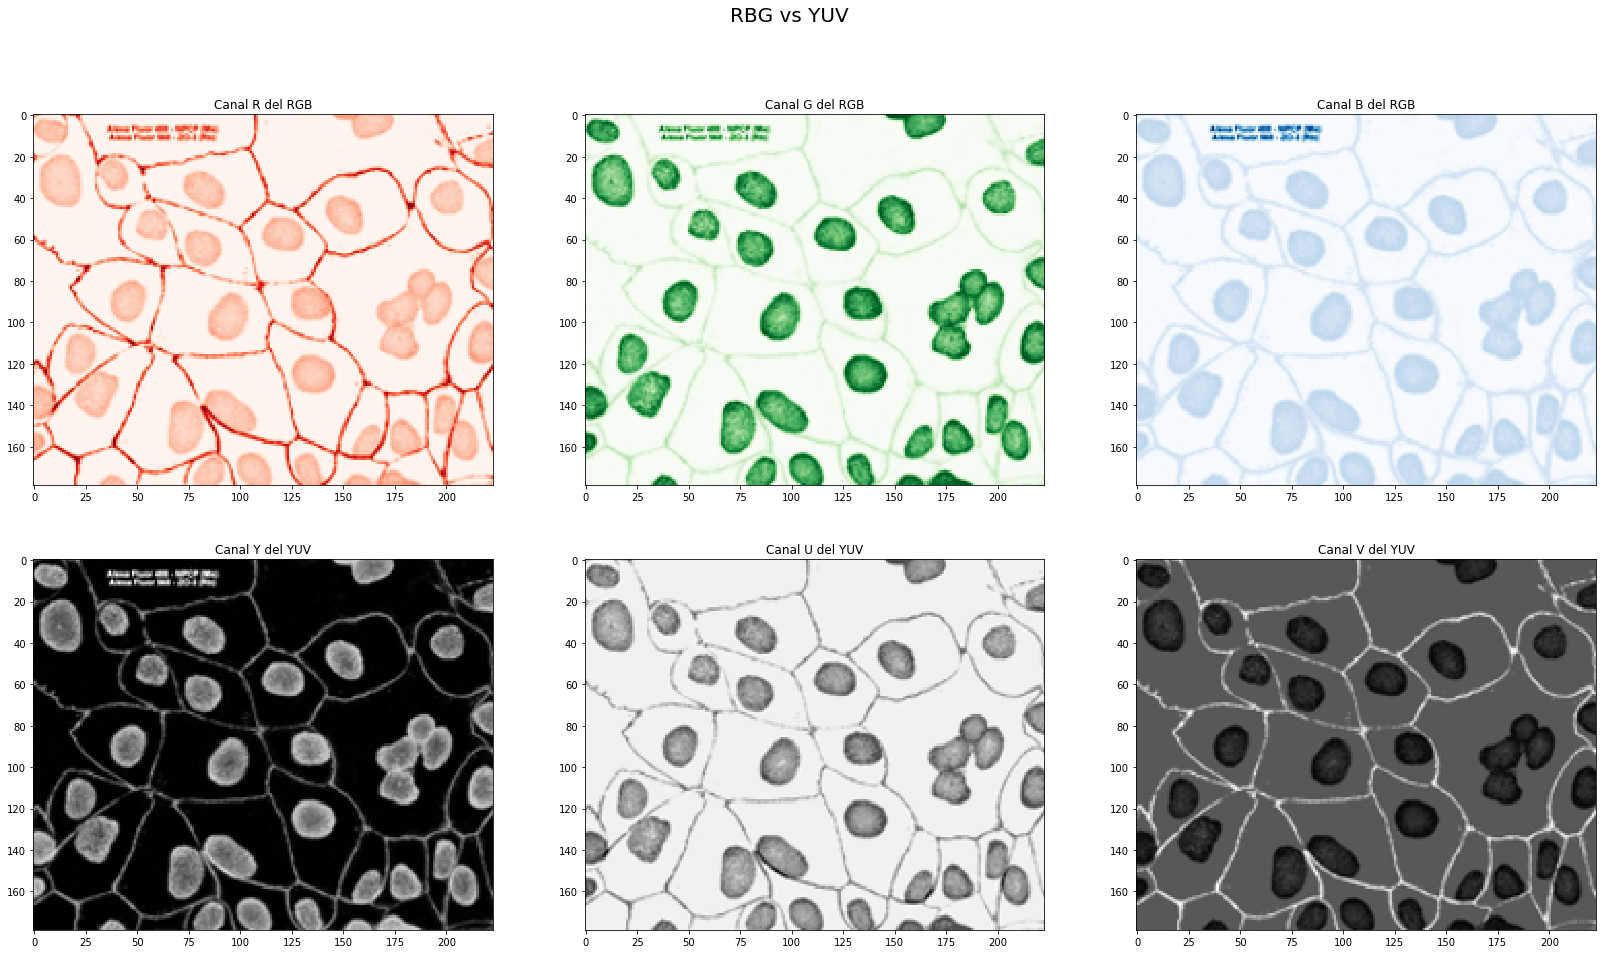

In [34]:
img = cv2.imread("res/cells.png", cv2.IMREAD_COLOR)

img_rgb  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_R = img_rgb[:,:,0]
img_G = img_rgb[:,:,1]
img_B = img_rgb[:,:,2]

img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

img_Y = img_yuv[:,:,0]
img_U =  img_yuv[:,:,1]
img_V = img_yuv[:,:,2]

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(28, 15))
fig.suptitle('RBG vs YUV', fontsize=20)
ax1.set_title('Canal R del RGB')
ax1.imshow(img_R, cmap='Reds', aspect='auto')
ax2.set_title('Canal G del RGB')
ax2.imshow(img_G, cmap='Greens', aspect='auto')
ax3.set_title('Canal B del RGB')
ax3.imshow(img_B, cmap='Blues', aspect='auto')
ax4.set_title('Canal Y del YUV')
ax4.imshow(img_Y, cmap='gray', aspect='auto')
ax5.set_title('Canal U del YUV')
ax5.imshow(img_U, cmap='gray', aspect='auto')
ax6.set_title('Canal V del YUV')
ax6.imshow(img_V, cmap='gray', aspect='auto')

## Modelos Perceptuales: 

Tienen cierta similitud con la percepción humana. Se trata de métodos en los que la representación del componente de color no es lineal.

### Modelos HSL y HSV: 

Los modelos HSL y HSV (o HSI) están pensados para ser fácilmente interpretables y legibles por un humano, usan términos más familiares cuando hablamos de color.

**Matiz de un color**: Su ángulo dentro de la rueda cromática. También, se puede definir como la frecuencia dominante del espectro.

**Saturación**: Diferencia del color respecto a un gris con la misma intensidad. Cuanto más diferente, más saturado. 

**Brillo, Luminosidad o Valor**: Cualidad de ser más claro o más oscuro.



<center>Rueda cromática</center>
<img src="res/rueda_cromatica.png"/>

<img src="res/hsv_hsl.png"/>

### Conversión RGB -> HSL y HSV:

<img src="res/hsv_hsl2.png"/>

### Conversión RGB -> HSL 

Para convertir RGB a HSL, seguimos el proceso descrito anteriormente. Sin embargo, hay que tener en cuenta que el Mátiz (H) va de 0 a 360 grados.

Importante:

* La conversión asume que los valores RGB están entre 0 y 1.

* La conversión da lugar a ángulos negativos, que aveces tendremos que convertir al ángulo positivo equivalente.

In [89]:
img = cv2.imread("res/alce.png", cv2.IMREAD_COLOR) 
img_rgb  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_rgb = img_rgb.astype(np.float32)/255  
img_R = img_rgb[:,:,0]
img_G = img_rgb[:,:,1]
img_B = img_rgb[:,:,2]

print(img_R)

[[0.00319877 0.00319877 0.00319877 ... 0.0031065  0.00312188 0.00309112]
 [0.00321415 0.00319877 0.00319877 ... 0.0031065  0.00312188 0.00309112]
 [0.00321415 0.00319877 0.00319877 ... 0.00312188 0.00312188 0.00309112]
 ...
 [0.00266052 0.00247597 0.00227605 ... 0.00255286 0.002599   0.00256824]
 [0.002599   0.00247597 0.00232218 ... 0.00241446 0.00267589 0.00266052]
 [0.00266052 0.00250673 0.00241446 ... 0.0023837  0.00270665 0.00262976]]


[[216.52171  216.52171  216.52171  ... 206.39998  204.54544  205.3846  ]
 [214.73682  209.99998  209.99998  ... 201.81816  202.85713  202.49998 ]
 [214.73682  209.99998  209.99998  ... 207.2727   205.71426  204.99998 ]
 ...
 [ 25.074638  25.312498  26.12903  ...  26.301369  24.705894  23.999998]
 [ 25.588247  25.970148  23.999998 ...  25.454544  27.042265  23.01371 ]
 [ 27.123299  26.197182  24.705881 ...  24.179104  26.842115  21.891891]]


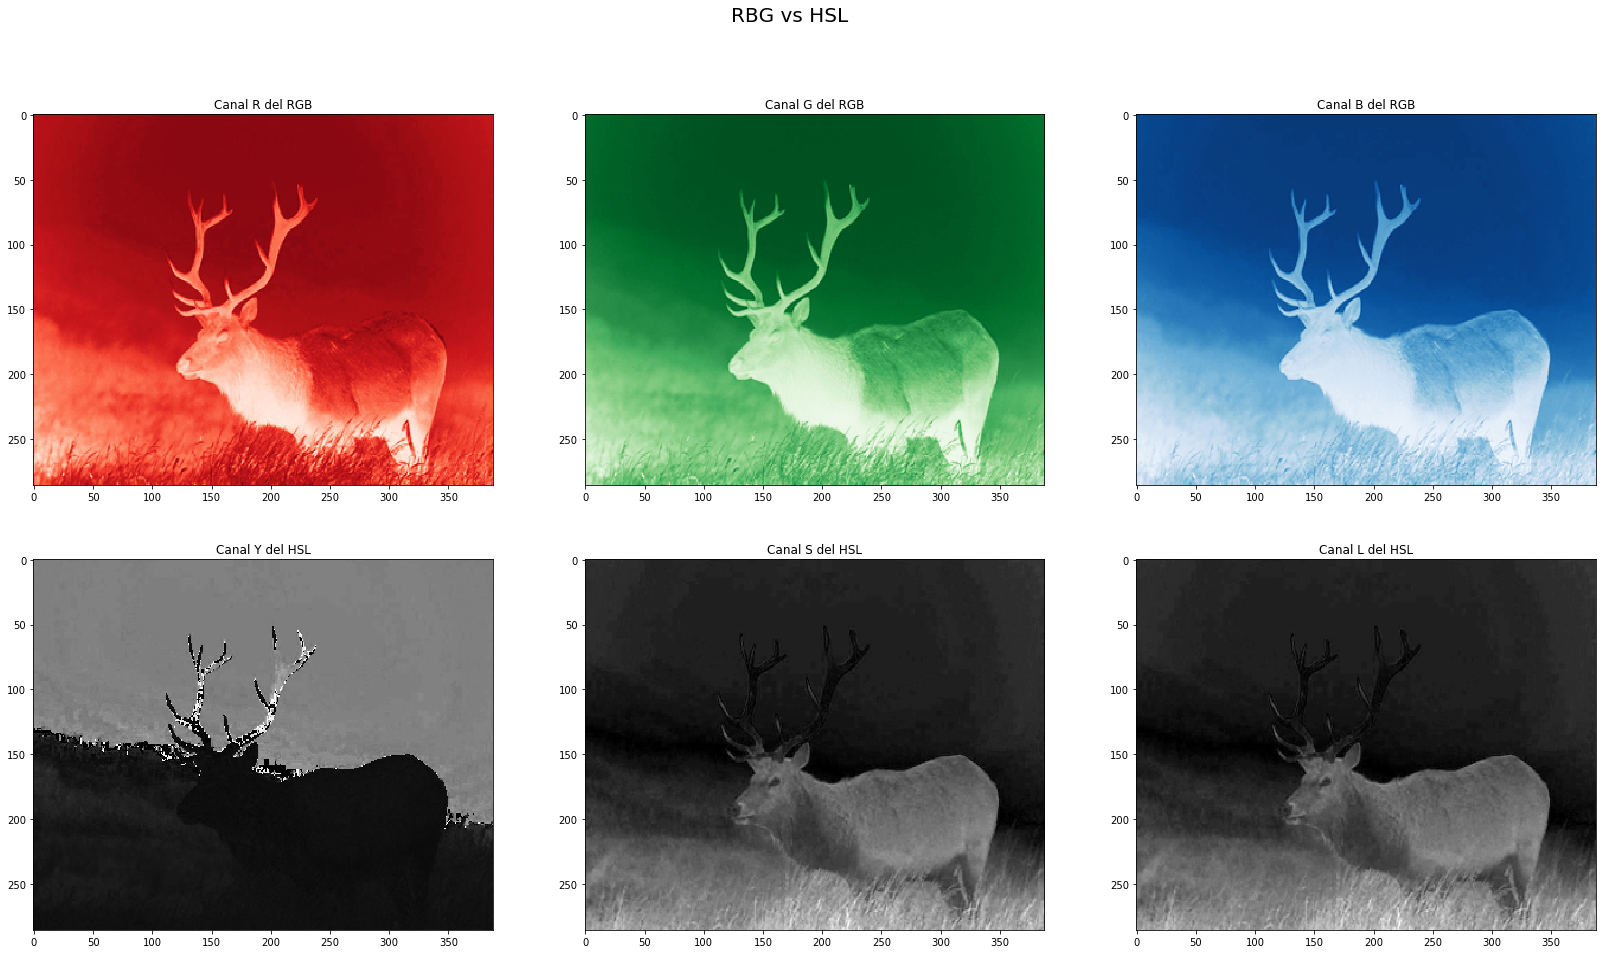

In [90]:
tam = np.shape(img_rgb)
img_hsl =np.zeros((tam), dtype=np.float32)

for i in range(tam[0]):
    for j in range(tam[1]):
        max_val = np.max(img_rgb[i][j])
        min_val = np.min(img_rgb[i][j])
        s = max_val - min_val
        l = s/2
        
        img_hsl[i][j][1] = s
        img_hsl[i][j][2] = l
        
        if(max_val==min_val):
            img_hsl[i][j][0] = 0
            continue
        red = img_rgb[i][j][0]
        green = img_rgb[i][j][1]
        blue = img_rgb[i][j][2]
        if(max_val == red):
            h = (green-blue)*60/(max_val-min_val)
        elif(max_val == green):
            h = (blue-red)*60/(max_val-min_val) + 120
        else:
            h = (red-green)*60/(max_val-min_val) + 240
        if h >= 0:
            img_hsl[i,j,0]=h
        else:
            img_hsl[i,j,0] = 360.0 - h
                    
print(img_hsl[:,:,0])
            
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(28, 15))
fig.suptitle('RBG vs HSL', fontsize=20)
ax1.set_title('Canal R del RGB')
ax1.imshow(img_R, cmap='Reds', aspect='auto')
ax2.set_title('Canal G del RGB')
ax2.imshow(img_G, cmap='Greens', aspect='auto')
ax3.set_title('Canal B del RGB')
ax3.imshow(img_B, cmap='Blues', aspect='auto')
ax4.set_title('Canal H del HSL')
ax4.imshow(img_hsl[:,:,0], cmap='gray', aspect='auto')
ax5.set_title('Canal S del HSL')
ax5.imshow(img_hsl[:,:,1], cmap='gray', aspect='auto')
ax6.set_title('Canal L del HSL')
ax6.imshow(img_hsl[:,:,2], cmap='gray', aspect='auto')

### RGB vs HSL

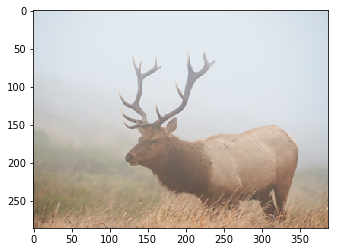

In [39]:
img = cv2.imread("res/alce.png", cv2.IMREAD_COLOR)
img_rgb  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

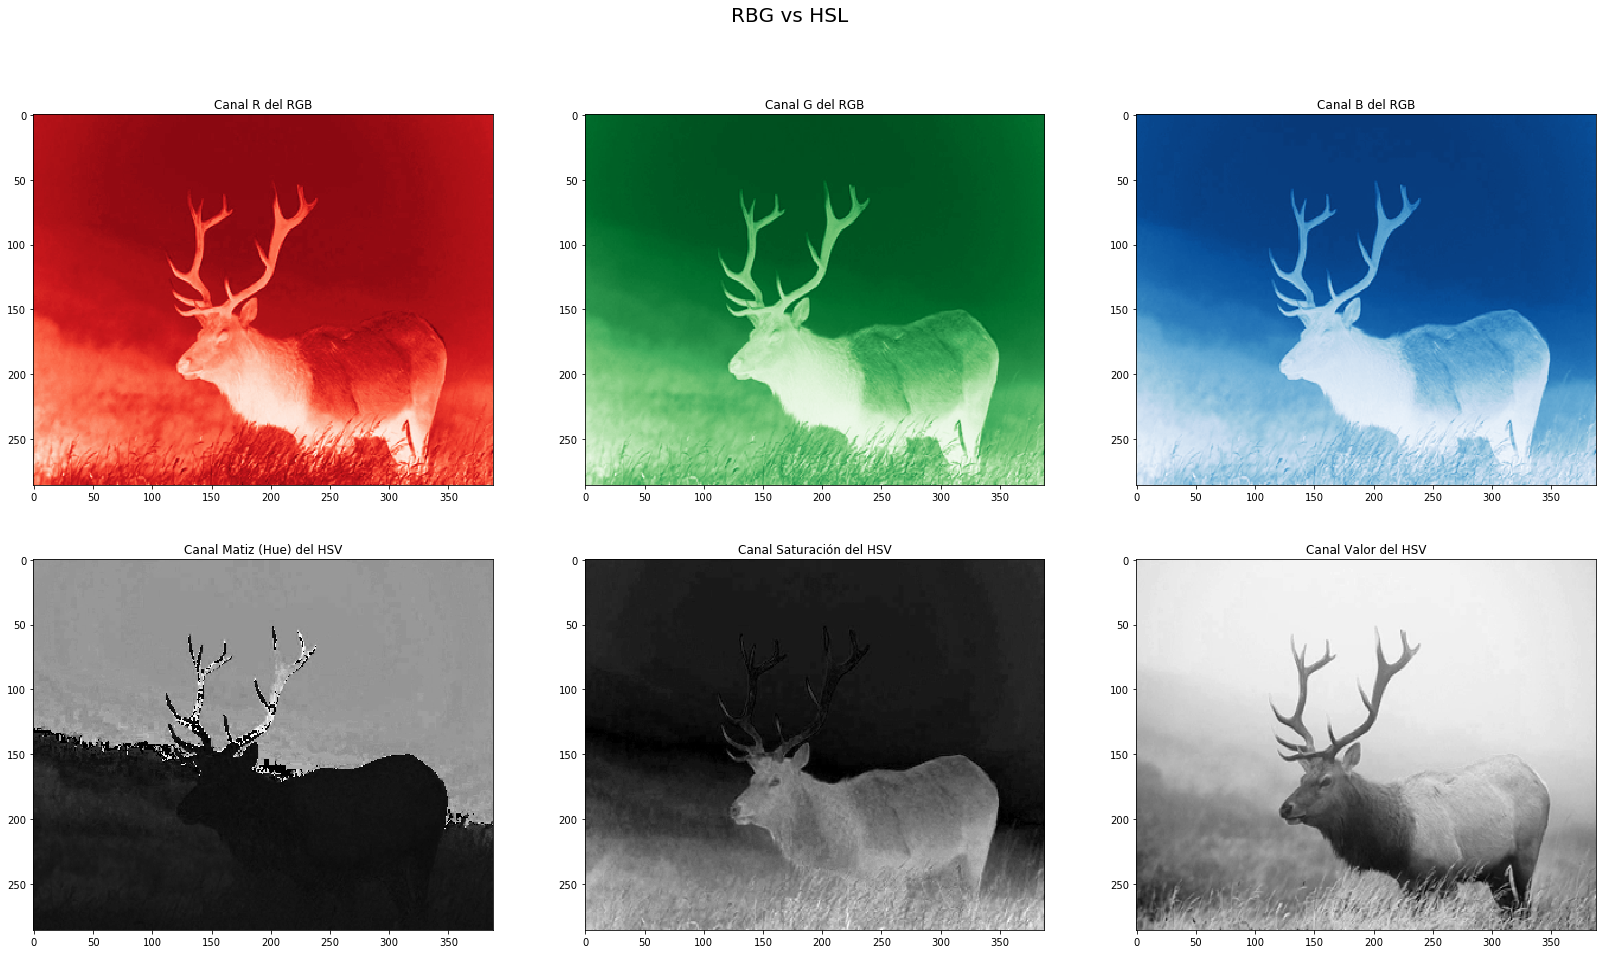

In [38]:
img_R = img_rgb[:,:,0]
img_G = img_rgb[:,:,1]
img_B = img_rgb[:,:,2]

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

img_H = img_hsv[:,:,0]
img_S =  img_hsv[:,:,1]
img_V = img_hsv[:,:,2]

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(28, 15))
fig.suptitle('RBG vs HSL', fontsize=20)
ax1.set_title('Canal R del RGB')
ax1.imshow(img_R, cmap='Reds', aspect='auto')
ax2.set_title('Canal G del RGB')
ax2.imshow(img_G, cmap='Greens', aspect='auto')
ax3.set_title('Canal B del RGB')
ax3.imshow(img_B, cmap='Blues', aspect='auto')
ax4.set_title('Canal Matiz (Hue) del HSV')
ax4.imshow(img_H, cmap='gray', aspect='auto')
ax5.set_title('Canal Saturación del HSV')
ax5.imshow(img_S, cmap='gray', aspect='auto')
ax6.set_title('Canal Valor del HSV')
ax6.imshow(img_V, cmap='gray', aspect='auto')

<img src="res/hsv_hsl3.png">

### Modelo L\*A\*B

Un modelo en el que L almacena toda la información sobre luminosidad a\* y b\* almacenan la información de color.


* En Adobe Photoshop, la edición de imágenes usando "Lab" es CIELAB D50.
* En Perfiles ICC, el espacio de color Lab usado como el espacio de conexión de perfil es CIELAB D50.
* En archivos TIFF, el espacio de color Lab es CIELAB.
* En documentos PDF, Lab es CIELAB.


El CIE L\*a\*b\* (CIELAB) es el modelo cromático usado normalmente para describir todos los colores que puede percibir el ojo humano.

https://sobrecolores.blogspot.com/2010/03/modo-de-color-lab.html

<img src="res/lab.png"/>

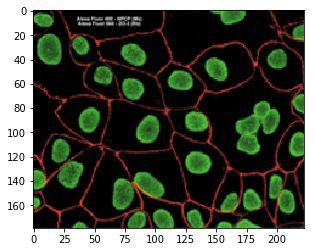

In [59]:
img = cv2.imread("res/cells.png", cv2.IMREAD_COLOR)
img_rgb  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

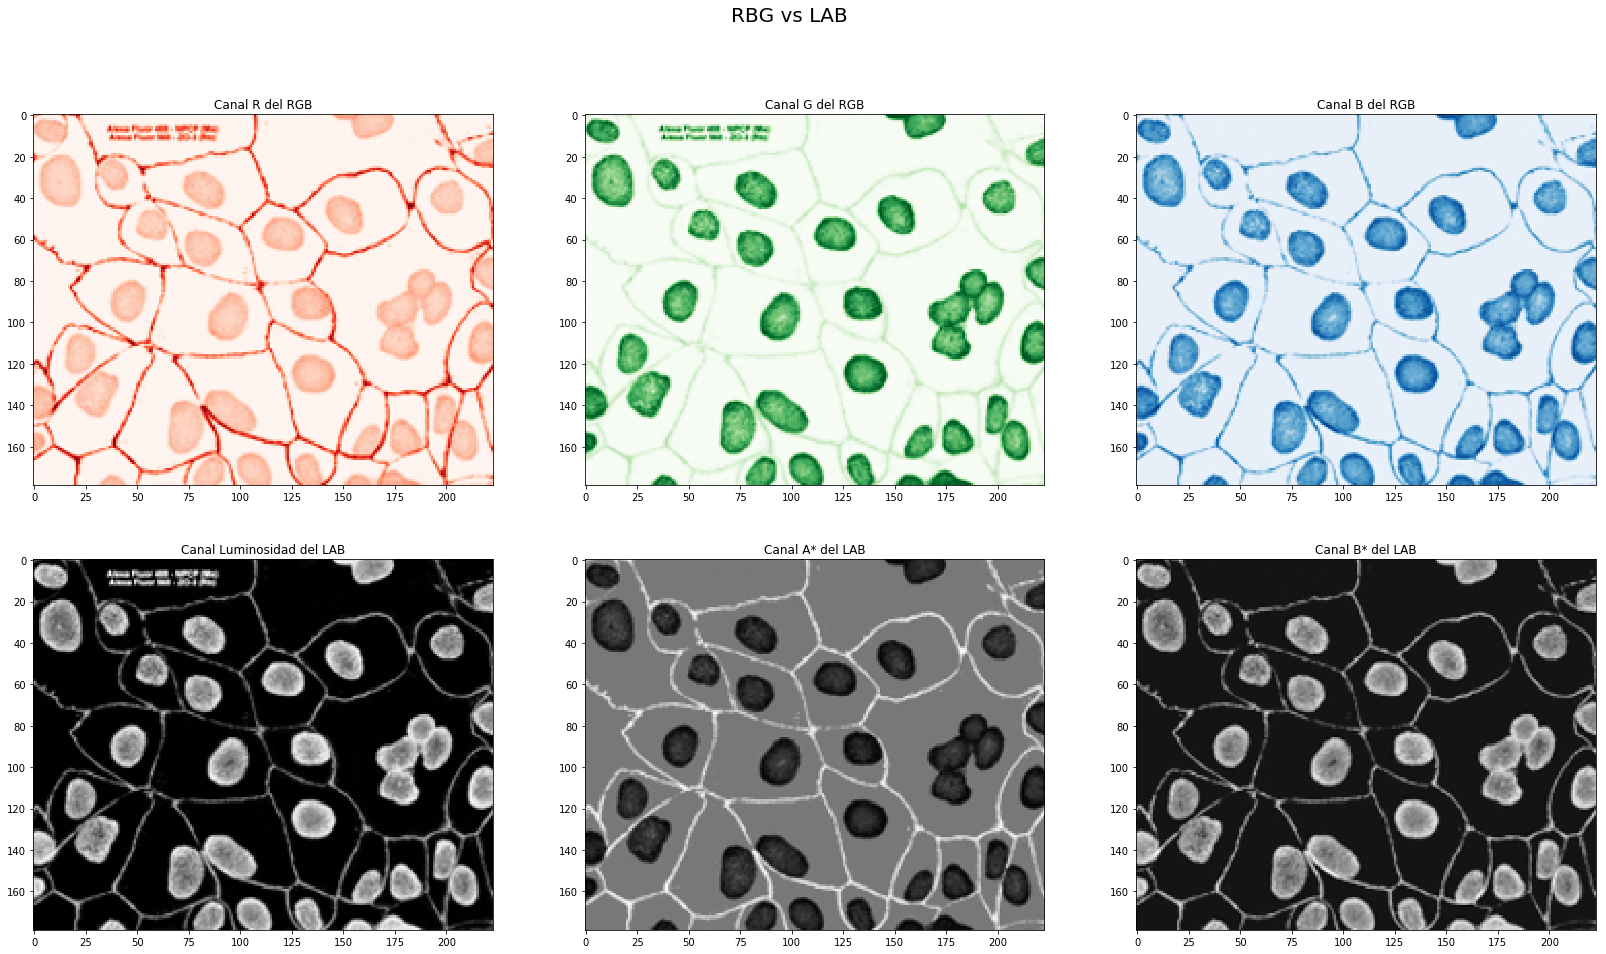

In [60]:
img_R = img_rgb[:,:,0]
img_G = img_rgb[:,:,1]
img_B = img_rgb[:,:,2]

img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

img_L = img_lab[:,:,0]
img_A =  img_lab[:,:,1]
img_B = img_lab[:,:,2]

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(28, 15))
fig.suptitle('RBG vs LAB', fontsize=20)
ax1.set_title('Canal R del RGB')
ax1.imshow(img_R, cmap='Reds', aspect='auto')
ax2.set_title('Canal G del RGB')
ax2.imshow(img_G, cmap='Greens', aspect='auto')
ax3.set_title('Canal B del RGB')
ax3.imshow(img_B, cmap='Blues', aspect='auto')
ax4.set_title('Canal Luminosidad del LAB')
ax4.imshow(img_L, cmap='gray', aspect='auto')
ax5.set_title('Canal A* del LAB')
ax5.imshow(img_A, cmap='gray', aspect='auto')
ax6.set_title('Canal B* del LAB')
ax6.imshow(img_B, cmap='gray', aspect='auto')



### ¿Qué pasa si intentamos visualizar una imagen en un espacio distinto al RGB?

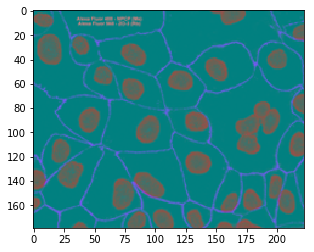

In [58]:
plt.imshow(img_yuv)

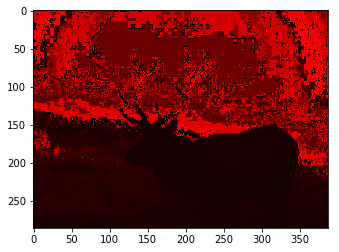

In [57]:
plt.imshow(img_hsv)

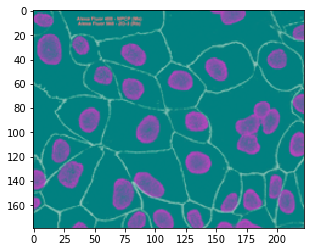

In [56]:
plt.imshow(img_lab)

# ¿Cómo utilizamos los distintos modelos de color para un sistema de visión?

El color es un fenómeno ligado a la percepción humana.

Existen muchos modelos de color, algunos creados con fines específicos.

Aunque externamente (entrada/salida) trabajemos normalmente con el modelo RGB, para realizar ciertas operaciones puede ser adecuado usar otros modelos de color:

* Transformar de RGB al otro modelo.
* Operar en el otro modelo.
* Transformar el resultado en el otro modelo a RGB.
* Estudiar, decidir y utilizar el modelo más adecuado a cada aplicación.

# Recapitulando...

<img src="res/recap.png"/>

http://davidjohnstone.net/pages/lch-lab-colour-gradient-picker

<hr>
## 3.5 Pseudocolor

El objetivo del Pseudocolor es asignar colores a imágenes monocromáticas basándose en algunas propiedades de su contenido de nivel de gris.

Existen diferentes métodos:

* Planos de intensidad
* Transformación de gris a color
* Filtrado

La técnica por planos de intensidad es la más simple: consiste en dividir las intensidades de gris para posteriormente asignar un color a cada porción. Considerando la imagen como una función bidimensional de la intensidad, el método se interpreta como la colocación de planos paralelos al de las coordenadas espaciales de la imagen → Cada plano divide a la función en el área de intersección.

<img src="res/pseudocolor1.png" height="400" width="400"/>
<img src="res/pseudocolor2.png" height="400" width="400"/>

### Los pasos para crear pseudocolor a partir de Planos de Intensidad son los siguientes:

* Dividir la función f (x, y) (imagen monocromática), en dos regiones a partir del nivel Gi
* Pixeles con niveles superiores a Gi  se les asigna el color 1
* Pixeles con niveles inferiores a Gi se les asigna el color 2

El resultado es una imagen bicolor, cuya apariencia relativa se puede controlar moviendo el plano de división hacia arriba y abajo sobre el eje de nivel de gris (modiﬁcando Gi). La técnica de planos de intensidad puede ampliarse a varios niveles de colores. 

Además, la técnica de planos de intensidad puede ampliarse a varios niveles de colores.

<img src="res/pseudocolor3.png" height="300" width="300"/>

<img src="res/pseudocolor4.png" height="500" width="500"/>
Ejemplo de implementación del pseudocolor usando colores aleatorios: 

<hr>

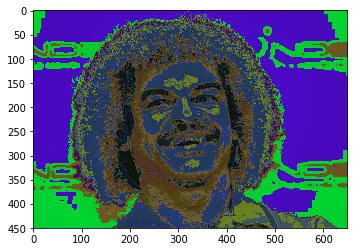

In [9]:
%matplotlib inline 
import cv2
import numpy as np
import random as rand
import math 
import matplotlib.pyplot as plt

def correspondence(val, paleta, rango):
    '''
    Receives the value of the grayscale, the color palette and size of the range array.
    Returns a tuple from the palette depending on the part of the range to which val belongs.
    '''
    pos=int( (val*(rango-1)/255))
    r,g,b=paleta[pos]
    r=r*val/255
    g=g*val/255
    b=b*val/255
    return (r,g,b)

def pseudocolor(img):
    rango=25
    paleta= [tuple(rand.randint(0,255) for j in range(3)) for i in range(rango)] 
    #generación aleatoria de la paleta de colores.
    tam=np.shape(img)
    res=np.zeros((tam[0],tam[1], 3), dtype=np.uint8)
    for r in range(tam[0]):
        for c in range(tam[1]):
            res[r][c]=correspondence(img[r][c], paleta, rango)
    return res    

img =  cv2.imread("res/pibe.jpg", cv2.IMREAD_GRAYSCALE)
pseudocolor_img = pseudocolor(img)
plt.imshow(pseudocolor_img)




# ACTIVIDAD 2: Obtenga de internet un mapa de alturas cualquiera, en escala de grises. Aplique pseudocolor basado en planos de intensidad, con por lo menos 20 niveles de color NO aleatorios.

Ejemplo de mapa utilizable: https://www.leonardobenini.it/wp-content/uploads/2015/05/02-australia-gray.jpg